In [1]:
import numpy as np
import pandas as pd
import glob 
import os
pd.options.display.max_columns=50

In [2]:
results = glob.glob('./results/performances/prelim-result-*')   # prelim-all-include-semi/
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

### Results of Individual Experiments

In [3]:
# for i in range(1,num_logs):
#     df = pd.read_csv(list2[-i])
#     info = ','.join(list(df[['data', 'sampling']].iloc[0]))
#     print(info)

In [4]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > min(list1)])
for i in range(1,num_logs):
    df = pd.read_csv(list2[-i])
    var = 'norm-precision'
    plt.figure()
    rolling_mean7 = df[var].rolling(window=7).mean()
    rolling_mean14 = df[var].rolling(window=14).mean()
    
    filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
    info = ','.join(list(df[['data', 'sampling']].iloc[0]))
#     plt.title(info+','+filename)
#     plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#     plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#     plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#     plt.legend(loc='upper left')
#     plt.ylabel(var)
#     plt.xlabel('numWeeks')
#     plt.show()
    
    full_results[info].append(rolling_mean14)
    plt.close()

### Mdata Simulation Results

The number of trials for each setting (Results are averaged):
real-m,hybrid 12
real-m,random 8
real-m,noupDATE 8
real-m,badge 8
real-m,bATE 8
real-m,DATE 8
real-m,randomupDATE 7


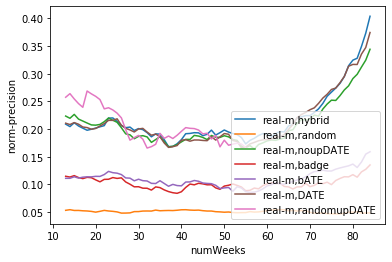

In [5]:
plt.figure()
info = ','.join(list(df[['data', 'sampling']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
     if key != 'real-m,xgb':
        print(key, len(full_results[key]))
        avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
        plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.show()
full_results[info] = rolling_mean14
plt.close()

### Tdata Simulation Results

The number of trials for each setting (Results are averaged):


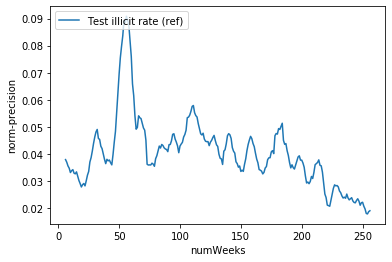

In [6]:
plt.figure()
info = ','.join(list(df[['data', 'sampling']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
#     if key != 'real-t,xgb':
    print(key, len(full_results[key]))
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    plt.plot(avg_result.index, avg_result, label=key)

# printing test_illicit_rate
tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.show()
full_results[info] = rolling_mean14
plt.close()

### Ndata Simulation Results

The number of trials for each setting (Results are averaged):
real-n,randomupDATE 8
real-n,noupDATE 8
real-n,random 8
real-n,badge 8
real-n,bATE 8
real-n,DATE 8
real-n,xgb 8


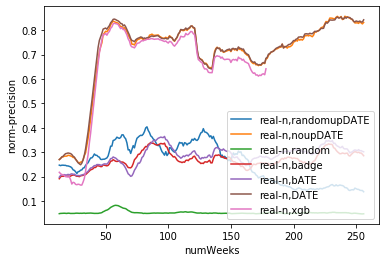

In [7]:
plt.figure()
info = ','.join(list(df[['data', 'sampling']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    print(key, len(full_results[key]))
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    plt.plot(avg_result.index, avg_result, label=key)
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')

plt.show()
full_results[info] = rolling_mean14
plt.close()

In [8]:
df = pd.read_csv('./data/mdata.csv')

In [9]:
df['exchange.rate']

0         338.1996
1         338.1996
2          39.8938
3          39.8938
4          39.8938
            ...   
419619     54.0682
419620    735.5670
419621    735.5670
419622     54.0682
419623     54.0682
Name: exchange.rate, Length: 419624, dtype: float64

In [10]:
df = pd.read_csv('./results/query_indices/1602388501.58-hybrid-5.0-scratch-week-1.csv')

In [13]:
df

,1,2013-07-01,2013-07-31
0,bATE,DATE,NaN
1,48448,45358,NaN
2,45807,46538,NaN
3,47944,52533,NaN
4,49760,45652,NaN
...,...,...,...
379,NaN,44087,NaN
380,NaN,49221,NaN
381,NaN,51596,NaN
382,NaN,49231,NaN
